In [4]:
path = "D:/IIT_Bombay_Techfest/dataset/"

In [2]:
import math
from pathlib import Path
import matplotlib.pyplot as plt
from warnings import simplefilter
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt

from datetime import date, timedelta # Date Functions
import matplotlib.dates as mdates # Formatting dates
from sklearn.metrics import mean_absolute_error, mean_squared_error # For measuring model performance / errors
from sklearn.preprocessing import MinMaxScaler #to normalize the price data 
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense # Deep learning classes for recurrent and regular densely-connected layers
import tensorflow as tf
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

Reading

In [9]:
df = pd.read_csv(path + "weblog_final_edit.csv")
df.iloc[0,0]

'29 Nov 2017 06 58 55'

Checking shape and printing

In [10]:
row,column = df.shape
row
df

,Time,Unnamed: 1
0,29 Nov 2017 06 58 55,NaN
1,29 Nov 2017 06 59 02,NaN
2,29 Nov 2017 06 59 03,NaN
3,29 Nov 2017 06 59 04,NaN
4,29 Nov 2017 06 59 06,NaN
...,...,...
16002,02 Mar 2018 15 47 12,NaN
16003,02 Mar 2018 15 47 23,NaN
16004,02 Mar 2018 15 47 32,NaN
16005,02 Mar 2018 15 47 35,NaN


Converting months in words to numbers

In [11]:
dct = {"Nov": 11, "Dec": 12, "Jan": 1, "Feb": 2, "Mar": 3}
for i in dct:
  print(dct[i])

11
12
1
2
3


Splitting day,month,year,hour,min,sec

In [12]:
j=0
dct = {"Nov": 11, "Dec": 12, "Jan": 1, "Feb": 2, "Mar": 3}
df_train = pd.DataFrame(columns = ["day","month","year","hour","min","sec"])
for i in range(row):
  str1 = str(df.iloc[i,0])
  lst = str1.split()
  if len(lst) == 6:
    for k in range(len(lst)):
      if lst[k] in dct:
        lst[k] = dct[lst[k]]
      lst[k] = int(lst[k])
    df_train.loc[j] = lst
    j=j+1
  else:
    continue
print(df_train)
df_train.iloc[1,5]
row, column = df_train.shape

      day month  year hour min sec
0      29    11  2017    6  58  55
1      29    11  2017    6  59   2
2      29    11  2017    6  59   3
3      29    11  2017    6  59   4
4      29    11  2017    6  59   6
...    ..   ...   ...  ...  ..  ..
15784   2     3  2018   15  47  12
15785   2     3  2018   15  47  23
15786   2     3  2018   15  47  32
15787   2     3  2018   15  47  35
15788   2     3  2018   15  47  46

[15789 rows x 6 columns]


# **NEED TO CHECK WHY THE MAKING THE LIST IS NOT WORKING.**

In [13]:
lst = []
ls1 = ["ab"]
count = 0;
print(row)

15789


Classified based on day,month,year,hour for count

In [14]:
lst = []
list_count= []
count = 0
ls1 = ["ab"]
for i in range(row):
  #print(i)
  time_str = str(df_train.iloc[i,0])+" "+str(df_train.iloc[i,1])+" "+str(df_train.iloc[i,2])+" "+str(df_train.iloc[i,3])
  #print(time_str)
  if (i == 0):
    count = 0
    ls1[0] = (time_str)
    #print(1)
  if(ls1[0] == (time_str)):
    count = count + 1
    #print(2)
  if(ls1[0] != (time_str))or(i==(row-1)):
    ls1.append(count)
    lst.append(ls1)
    #print(ls1)
    ls_count = [(df_train.iloc[(i-1),0]),(df_train.iloc[(i-1),1]),(df_train.iloc[(i-1),2]),(df_train.iloc[(i-1),3]),count]
    #print(ls_count)
    list_count.append(ls_count)
    #print(3)
    count = 1
    ls1 = ["ab"]
    ls1[0] = (str(df_train.iloc[i,0])+" "+str(df_train.iloc[i,1])+" "+str(df_train.iloc[i,2])+" "+str(df_train.iloc[i,3]))
  #print(lst) # this generation seem redundant but temporarily kept
  #print(list_count)

Creating a new DataFrame for having the count information

In [15]:
df_count = pd.DataFrame(data = list_count, columns =["day","month","year","hour","count"])
print(df_count)
#df_count['day'] = (df_count['day']-15.5)/31
#df_count['month'] = (df_count['month']-6)/12
#df_count['hour'] = (df_count['day']-12)/24

##### another method was to check whether normalised data had better accuracy
##### The above few statements can be used to check too
row_count, column_count = df_count.shape
#print(row_count)



     day  month  year  hour  count
0     29     11  2017     6     11
1     29     11  2017     7      2
2     29     11  2017    13     38
3     29     11  2017    14     42
4     29     11  2017    15     97
..   ...    ...   ...   ...    ...
661    2      3  2018     4     40
662    2      3  2018     5     10
663    2      3  2018     6     54
664    2      3  2018    14      1
665    2      3  2018    15     38

[666 rows x 5 columns]


Removing overly skewed data points

In [16]:
mean_value = df_count['count'].mean()
print(mean_value)
df_count=df_count[df_count['count']<(9*mean_value)]
print(df_count.iloc[562])
df_count.dropna(inplace = True)
X = df_count.loc[:,['day','month','hour']]
X.dropna(inplace = True)
Y = df_count.loc[:,'count']


x_index = df_count.index
Y,X = Y.align(X, join = 'inner')
X_train, X_test,Y_train, Y_test = train_test_split(X,Y ,
                                   random_state=104, 
                                   test_size=0.1, 
                                   shuffle=True)



23.707207207207208
day        16
month       2
year     2018
hour       11
count      17
Name: 568, dtype: int64


# Do not use the below cell while running

In [17]:
model_1 = LinearRegression()
model_1.fit(X_train,Y_train)

Y_pred = pd.Series(model_1.predict(X_test), index = X_test.index)
Y_full_pred = pd.Series(model_1.predict(X), index = X.index)
print(Y[100])
print(Y_full_pred[100])
#print(Y_test)
#print(abs(Y_test-Y_pred))
print(sqrt((mean_squared_error(Y_full_pred, Y))))

2
8.291852714576226
19.68911336591772


# Code continues here for RNN

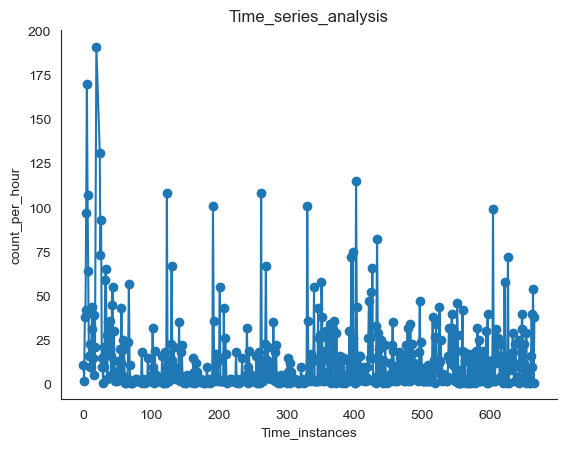

In [18]:
x=df_count.index
y = Y

plt.plot(x,y,marker="o")
plt.xlabel("Time_instances")
plt.ylabel("count_per_hour")
plt.title("Time_series_analysis")
plt.show()

NOTE: Beyond this point df_count will start to change if required should be copied before hand

In [21]:
# Feature Selection - Only Close Data
df_count_cpy = df_count.copy()
train_df = df_count.filter(['count'])
data_unscaled = train_df.values

# Get the number of rows to train the model on 80% of the data 
train_data_length = math.ceil(len(data_unscaled) * 0.8)

# Transform features by scaling each feature to a range between 0 and 1
mmscaler = MinMaxScaler(feature_range=(0, 1))
np_data = mmscaler.fit_transform(data_unscaled)

In [22]:
# Set the sequence length - this is the timeframe used to make a single prediction
sequence_length = 100

# Prediction Index
index_count = train_df.columns.get_loc("count")
print(index_count)
#index_count is basically the value of index_count

# Split the training data into train and train data sets
# As a first step, we get the number of rows to train the model on 80% of the data 
train_data_len = math.ceil(np_data.shape[0] * 0.8)

# Create the training and test data
train_data = np_data[0:train_data_len, :]
test_data = np_data[train_data_len - sequence_length:, :]

# The RNN needs data with the format of [samples, time steps, features]
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset(sequence_length, train_df):
    x, y = [], []
    data_len = train_df.shape[0]
    for i in range(sequence_length, data_len):
        x.append(train_df[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(train_df[i, index_count]) #contains the prediction values for validation (3rd column = Close),  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

# Generate training data and test data
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Validate that the prediction value and the input match up
# The last close price of the second input sample should equal the first prediction value
print(x_test[1][sequence_length-1][index_count])
print(y_test[0])

0
(428, 100, 1) (428,)
(132, 100, 1) (132,)
0.015789473684210527
0.015789473684210527


In [23]:
# Configure the neural network model
model = Sequential()

neurons = sequence_length

# Model with sequence_length Neurons 
# inputshape = sequence_length Timestamps
model.add(LSTM(neurons, return_sequences=True, input_shape=(x_train.shape[1], 1))) 
model.add(LSTM(neurons, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Training the model
model.fit(x_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
27/27 [==============================] - 4s 44ms/step - loss: 0.0080
Epoch 2/100
27/27 [==============================] - 1s 44ms/step - loss: 0.0076
Epoch 3/100
27/27 [==============================] - 1s 45ms/step - loss: 0.0076
Epoch 4/100
27/27 [==============================] - 1s 45ms/step - loss: 0.0076
Epoch 5/100
27/27 [==============================] - 1s 50ms/step - loss: 0.0076
Epoch 6/100
27/27 [==============================] - 1s 51ms/step - loss: 0.0076
Epoch 7/100
27/27 [==============================] - 1s 44ms/step - loss: 0.0077
Epoch 8/100
27/27 [==============================] - 1s 44ms/step - loss: 0.0076
Epoch 9/100
27/27 [==============================] - 1s 52ms/step - loss: 0.0078
Epoch 10/100
27/27 [==============================] - 1s 48ms/step - loss: 0.0076
Epoch 11/100
27/27 [==============================] - 1s 47ms/step - loss: 0.0077
Epoch 12/100
27/27 [==============================] - 1s 51ms/step - loss: 0.0076
Epoch 13/100
27/27 [=====

In [31]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)
y_pred = mmscaler.inverse_transform(y_pred_scaled)
print(y_pred.min())
#y_pred = y_pred + abs(y_pred.min())
## The above is a unecessary step, but since I see negative values, I have shifter the graph above zero
print(y_pred.min())

y_test_unscaled = mmscaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 0s 16ms/step
2.3618019
2.3618019


In [32]:
# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 11.38
Mean Absolute Percentage Error (MAPE): 295.72 %
Median Absolute Percentage Error (MDAPE): 78.28 %


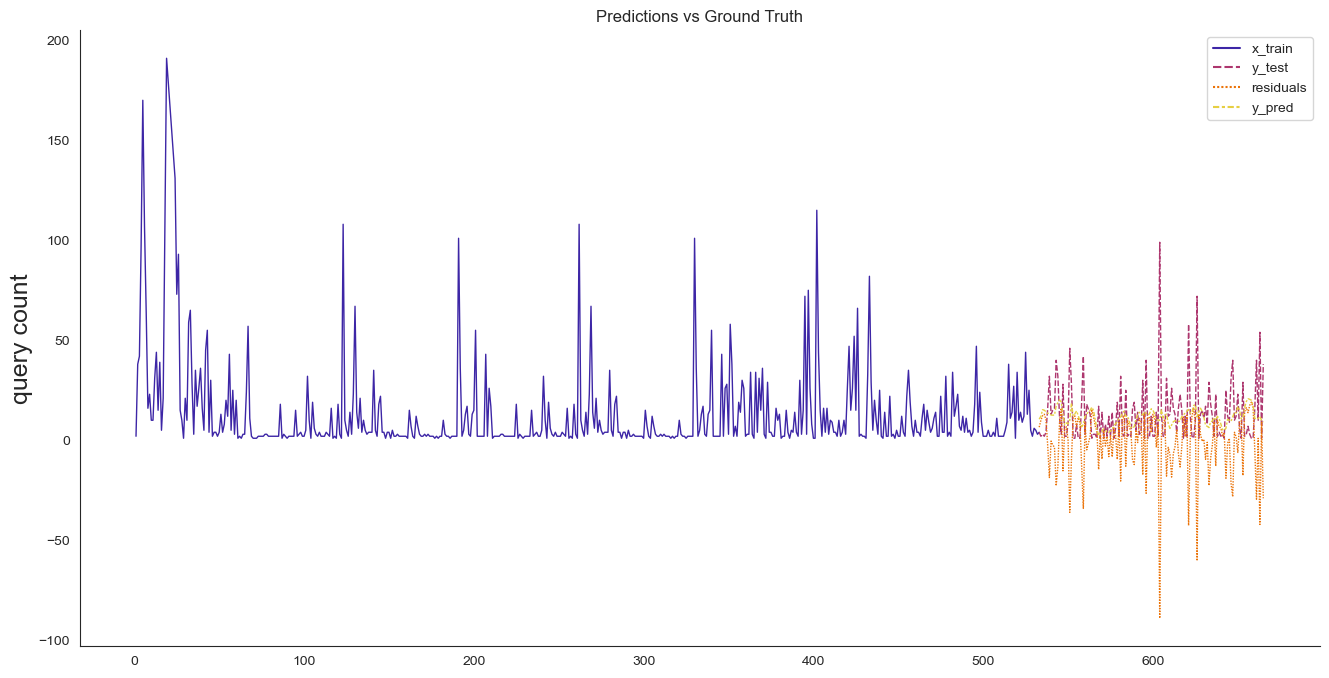

2.3618019


In [33]:
# Add the difference between the valid and predicted prices
train = pd.DataFrame(train_df[:train_data_length + 1]).rename(columns={'count': 'x_train'})
valid = pd.DataFrame(train_df[train_data_length:]).rename(columns={'count': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])
#df_union = pd.concat([train])

# Zoom in to a closer timeframe
df_union_zoom = df_union[df_union.index > 0]

# Create the lineplot
fig, ax = plt.subplots(figsize=(16, 8), sharex=True)
plt.title("Predictions vs Ground Truth")
plt.ylabel("query count", fontsize=18)
sns.lineplot(data=df_union_zoom, linewidth=1.0, palette='CMRmap')
plt.show()

print((y_pred.min()))